In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras._tf_keras.keras.utils import to_categorical
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
# --- Configuration ---
DATA_CSV_FILE = 'landmark_data_raw_new.csv'
LABEL_MAP_FILE = 'label_map_new.pkl'
TEST_SIZE = 0.2
RANDOM_STATE = 42

In [183]:
# --- Load Data using Pandas ---
try:
    df = pd.read_csv(DATA_CSV_FILE)
    print(f"Data loaded successfully from {DATA_CSV_FILE}")
    print(f"Original shape of loaded data: {df.shape}")
    # print(df.head())
except FileNotFoundError:
    print(f"Error: Data file '{DATA_CSV_FILE}' not found. Please run the modified Step 1 first.")
    exit()
except Exception as e:
    print(f"Error loading data: {e}")
    exit()

Data loaded successfully from landmark_data_raw_new.csv
Original shape of loaded data: (4800, 43)


Data Loading

In [184]:
# Loading the Data
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv(DATA_CSV_FILE)

In [185]:
# Making sure the data is successfully loaded
df.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9,x10,y10,x11,y11,x12,y12,x13,y13,x14,y14,x15,y15,x16,y16,x17,y17,x18,y18,x19,y19,x20,y20,x21,y21,label
0,0.322582,0.737875,0.427704,0.703540,0.518315,0.602957,0.554926,0.490326,0.575761,0.392042,0.478152,0.451110,0.507361,0.412988,0.483108,0.519906,0.462907,0.581865,0.414214,0.429583,0.441073,0.411110,0.418165,0.541194,0.404858,0.597104,0.348295,0.426819,0.371932,0.405005,0.360497,0.535044,0.353256,0.591749,0.277916,0.437749,0.307684,0.410954,0.310465,0.510309,0.304974,0.556992,A
1,0.321863,0.733694,0.427303,0.699804,0.517524,0.599942,0.551485,0.487339,0.572468,0.388971,0.477011,0.453146,0.504169,0.407243,0.482797,0.511526,0.462289,0.578658,0.412879,0.433188,0.440568,0.403436,0.419330,0.535122,0.406225,0.599789,0.347333,0.429274,0.372499,0.400406,0.361682,0.530825,0.354838,0.590509,0.276861,0.439457,0.307862,0.409631,0.310219,0.510191,0.305339,0.557227,A
2,0.317428,0.737160,0.422518,0.700661,0.511955,0.601434,0.549255,0.490636,0.571890,0.393582,0.474706,0.452855,0.501475,0.410877,0.478234,0.512949,0.459605,0.575336,0.411340,0.431885,0.436318,0.408023,0.415151,0.533787,0.402559,0.593326,0.345798,0.428153,0.367338,0.402384,0.358225,0.528868,0.352386,0.589389,0.275064,0.437586,0.304478,0.407649,0.308639,0.504772,0.304228,0.554784,A
3,0.341305,0.729370,0.452557,0.671950,0.530473,0.533294,0.543657,0.385818,0.554784,0.269705,0.474726,0.411190,0.480324,0.329468,0.465989,0.435653,0.458965,0.512891,0.403747,0.412351,0.410622,0.345565,0.406628,0.486175,0.409062,0.561995,0.338533,0.424897,0.341667,0.360317,0.348798,0.499050,0.356451,0.571590,0.271153,0.446899,0.281536,0.393688,0.296156,0.495207,0.305415,0.549337,A
4,0.341451,0.725601,0.453168,0.668798,0.530813,0.531338,0.544261,0.387062,0.556422,0.272914,0.476442,0.411559,0.482457,0.325169,0.469272,0.429994,0.462170,0.509621,0.404629,0.412072,0.411796,0.345470,0.407799,0.485554,0.409335,0.562150,0.337900,0.424669,0.341833,0.359352,0.348991,0.497062,0.356344,0.570372,0.269071,0.447311,0.280916,0.390223,0.295459,0.491485,0.303764,0.547401,A


Data Exploration

In [186]:
# Understanding the nature of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      4800 non-null   float64
 1   y1      4800 non-null   float64
 2   x2      4800 non-null   float64
 3   y2      4800 non-null   float64
 4   x3      4800 non-null   float64
 5   y3      4800 non-null   float64
 6   x4      4800 non-null   float64
 7   y4      4800 non-null   float64
 8   x5      4800 non-null   float64
 9   y5      4800 non-null   float64
 10  x6      4800 non-null   float64
 11  y6      4800 non-null   float64
 12  x7      4800 non-null   float64
 13  y7      4800 non-null   float64
 14  x8      4800 non-null   float64
 15  y8      4800 non-null   float64
 16  x9      4800 non-null   float64
 17  y9      4800 non-null   float64
 18  x10     4800 non-null   float64
 19  y10     4800 non-null   float64
 20  x11     4800 non-null   float64
 21  y11     4800 non-null   float64
 22  

In [187]:
df.describe()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9,x10,y10,x11,y11,x12,y12,x13,y13,x14,y14,x15,y15,x16,y16,x17,y17,x18,y18,x19,y19,x20,y20,x21,y21
count,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000
mean,0.434737,0.630881,0.479057,0.607932,0.504740,0.553342,0.499835,0.510359,0.483843,0.480996,0.482003,0.455270,0.490461,0.403409,0.487791,0.407906,0.481129,0.413388,0.448504,0.450937,0.458399,0.405555,0.463700,0.424894,0.464335,0.431151,0.418743,0.461698,0.428192,0.432149,0.442640,0.469916,0.448900,0.489184,0.391510,0.482730,0.402359,0.460535,0.415912,0.482747,0.422047,0.493450
std,0.179478,0.124291,0.174416,0.107634,0.175014,0.075328,0.181403,0.061120,0.190457,0.072793,0.178152,0.067604,0.187082,0.056748,0.192329,0.078791,0.197013,0.112322,0.176568,0.071350,0.183014,0.068146,0.182338,0.099334,0.181903,0.134914,0.176031,0.077298,0.183296,0.079634,0.183328,0.096268,0.182757,0.117263,0.177700,0.084566,0.183529,0.083440,0.184503,0.094673,0.184502,0.111152
min,0.099609,0.174209,0.152276,0.230458,0.163398,0.304662,0.117880,0.376148,0.071362,0.264398,0.148275,0.196810,0.120128,0.221271,0.108799,0.205547,0.072372,0.213364,0.120826,0.192734,0.102809,0.199392,0.103621,0.189633,0.119071,0.176300,0.095076,0.199790,0.077004,0.201336,0.066386,0.191400,0.049871,0.202197,0.057758,0.213749,0.056762,0.232984,0.054400,0.215732,0.053814,0.225392
25%,0.307744,0.594661,0.347545,0.560127,0.366677,0.504761,0.355526,0.469762,0.357204,0.438951,0.340172,0.414692,0.361349,0.373335,0.360468,0.340767,0.356196,0.305920,0.296350,0.406361,0.322933,0.357651,0.330607,0.328966,0.332301,0.286806,0.268707,0.410989,0.283786,0.365208,0.308932,0.410746,0.319191,0.438256,0.259309,0.427209,0.268847,0.401877,0.294586,0.413396,0.301955,0.418720
50%,0.436008,0.643298,0.462835,0.626237,0.506236,0.555864,0.515223,0.506243,0.484177,0.481117,0.472017,0.468808,0.494269,0.401803,0.485852,0.401672,0.483144,0.424149,0.442796,0.466768,0.451678,0.400077,0.455797,0.447005,0.456651,0.474321,0.423331,0.473675,0.429643,0.449824,0.443601,0.496600,0.449911,0.530370,0.399643,0.488909,0.401652,0.461238,0.407108,0.491355,0.408597,0.513980
75%,0.549010,0.720246,0.598840,0.687239,0.629991,0.608985,0.628473,0.548144,0.628887,0.534725,0.621054,0.501968,0.634265,0.441874,0.623904,0.465285,0.616640,0.509825,0.576980,0.498837,0.589828,0.454114,0.584132,0.508597,0.593639,0.541279,0.545597,0.520249,0.559228,0.482826,0.577475,0.535120,0.581925,0.566901,0.511610,0.545229,0.537614,0.509267,0.551232,0.550084,0.556084,0.567220
max,0.822069,0.810816,0.856188,0.791641,0.889571,0.734937,0.895582,0.688552,0.941994,0.644154,0.895436,0.585188,0.916774,0.567343,0.928516,0.574152,0.935678,0.645816,0.852044,0.635275,0.875333,0.620821,0.895191,0.611339,0.909222,0.677554,0.806440,0.686866,0.822887,0.690735,0.836981,0.685621,0.842661,0.695019,0.763015,0.740695,0.792741,0.735103,0.813782,0.724592,0.821324,0.720070


In [188]:
# Checking if the data contains nulls
df.isna().sum()

x1       0
y1       0
x2       0
y2       0
x3       0
y3       0
x4       0
y4       0
x5       0
y5       0
x6       0
y6       0
x7       0
y7       0
x8       0
y8       0
x9       0
y9       0
x10      0
y10      0
x11      0
y11      0
x12      0
y12      0
x13      0
y13      0
x14      0
y14      0
x15      0
y15      0
x16      0
y16      0
x17      0
y17      0
x18      0
y18      0
x19      0
y19      0
x20      0
y20      0
x21      0
y21      0
label    0
dtype: int64

In [189]:
# Checking if the data is balanced or not
df['label'].value_counts()

label
A    200
B    200
X    200
W    200
V    200
U    200
T    200
S    200
R    200
Q    200
P    200
O    200
N    200
M    200
L    200
K    200
I    200
H    200
G    200
F    200
E    200
D    200
C    200
Y    200
Name: count, dtype: int64

Data Visualization

C:\Users\Reez\AppData\Local\Temp\ipykernel_15516\3595195236.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['label'], order=df['label'].value_counts().index, palette="viridis")


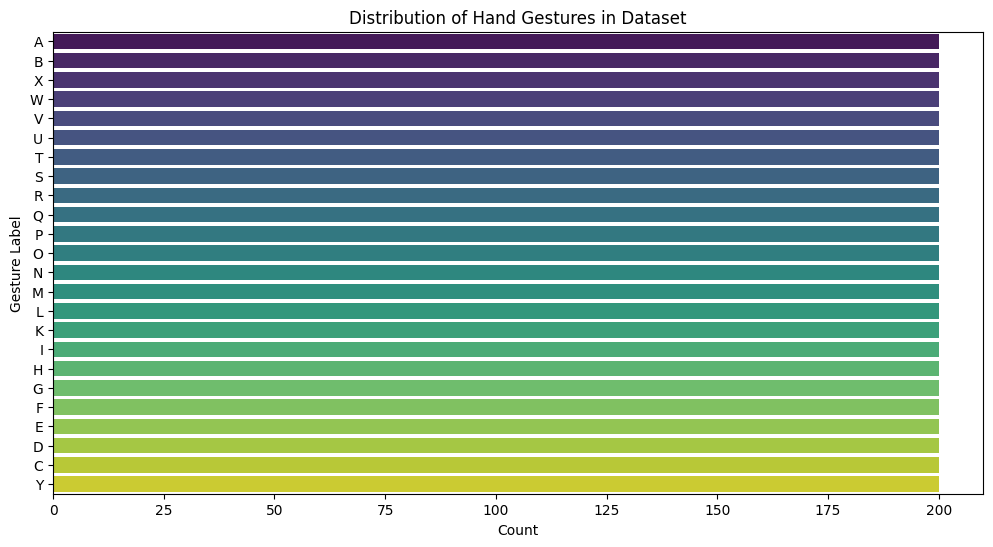

In [190]:
# Visualizing the count of each class
plt.figure(figsize=(12, 6))
sns.countplot(y=df['label'], order=df['label'].value_counts().index, palette="viridis")
plt.xlabel("Count")
plt.ylabel("Gesture Label")
plt.title("Distribution of Hand Gestures in Dataset")
plt.show()

In [191]:
# Visualizing the different classes
def plot_hand_gesture(df, sample_index):

    sample = df.iloc[sample_index]
    x_coords = [sample[f'x{i}'] for i in range(1, 22)]
    y_coords = [sample[f'y{i}'] for i in range(1, 22)]
    y_coords = np.max(y_coords) - np.array(y_coords)

    connections = [
        (0, 1), (1, 2), (2, 3), (3, 4),  # Thumb
        (0, 5), (5, 6), (6, 7), (7, 8),  # Index finger
        (5, 9), (9, 10), (10, 11), (11, 12),  # Middle finger
        (9, 13), (13, 14), (14, 15), (15, 16),  # Ring finger
        (0, 17), (13, 17), (17, 18), (18, 19), (19, 20)  # Pinky finger
    ]

    plt.figure(figsize=(5, 5))
    plt.scatter(x_coords, y_coords, color='red', label="Keypoints")
    for connection in connections:
        x1, y1 = x_coords[connection[0]], y_coords[connection[0]]
        x2, y2 = x_coords[connection[1]], y_coords[connection[1]]
        plt.plot([x1, x2], [y1, y2], 'b', linewidth=2)

    gesture_label = sample['label']

    # Display plot
    plt.title(f"Hand Gesture: {gesture_label}")
    plt.axis("equal")
    plt.legend()
    plt.show()

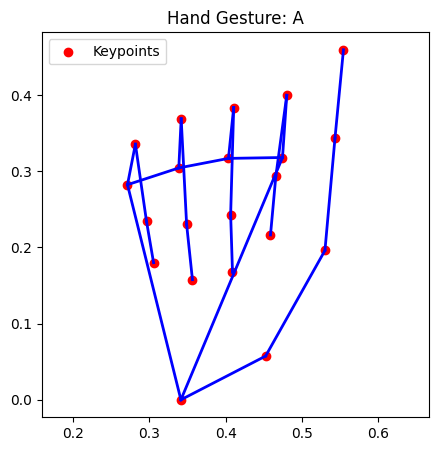

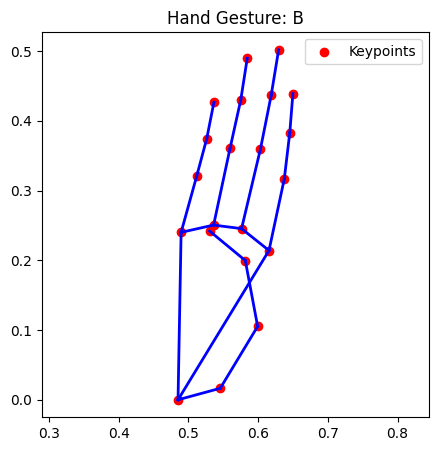

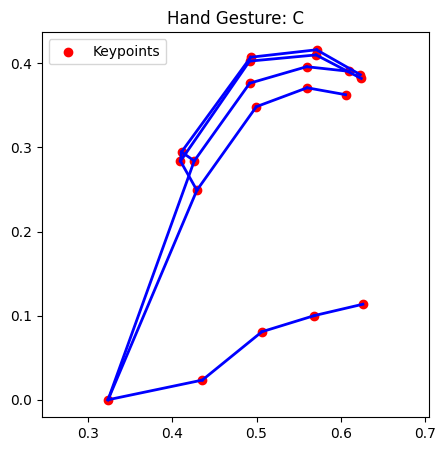

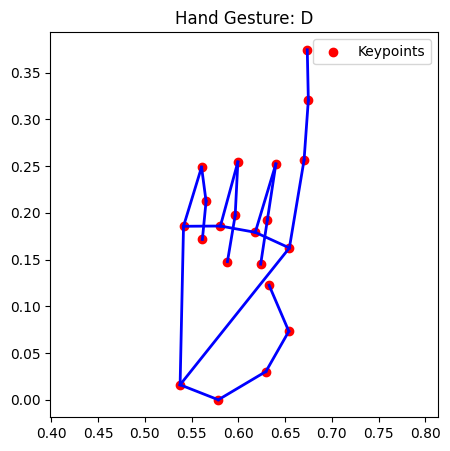

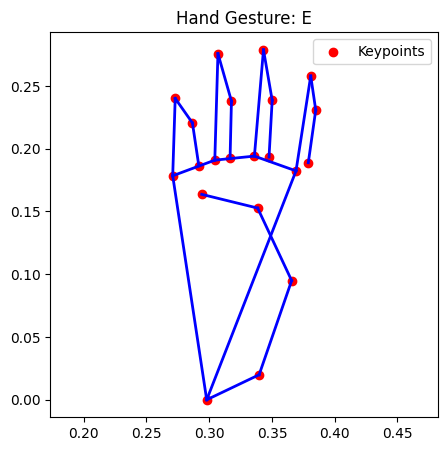

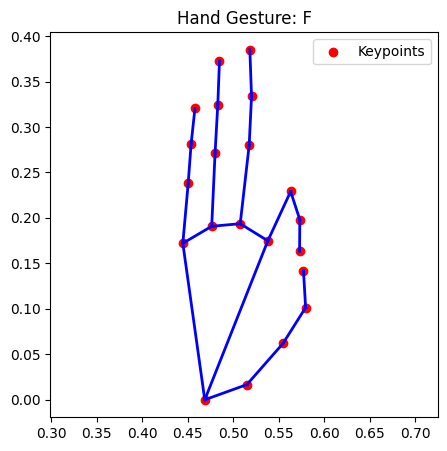

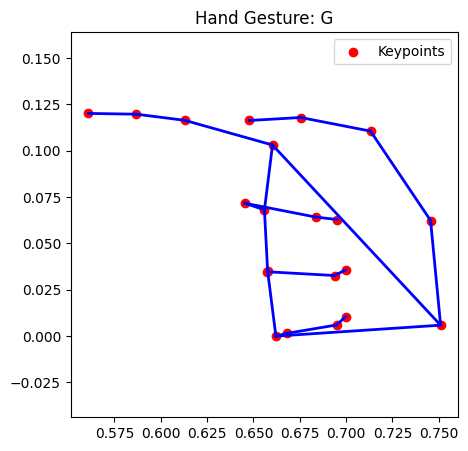

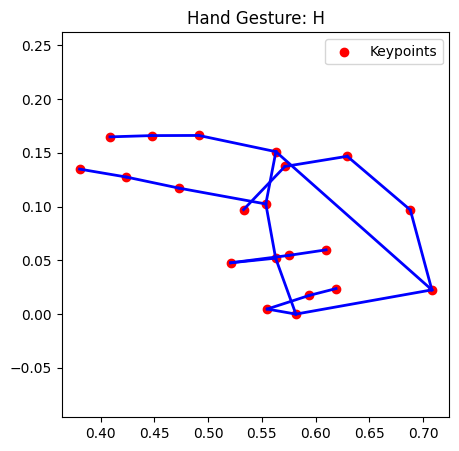

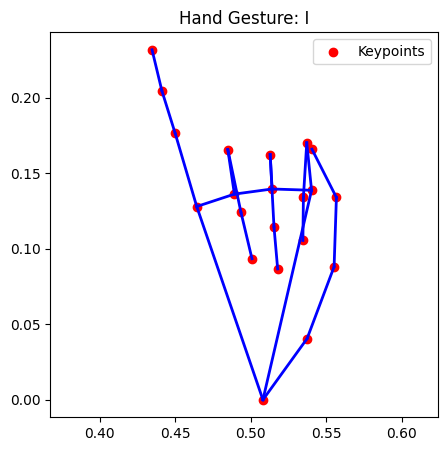

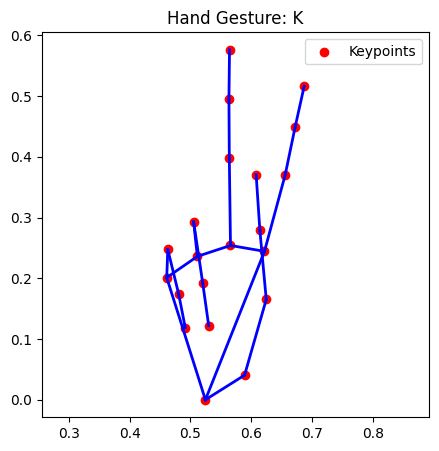

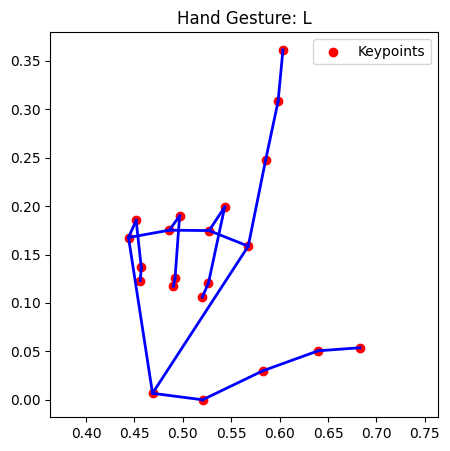

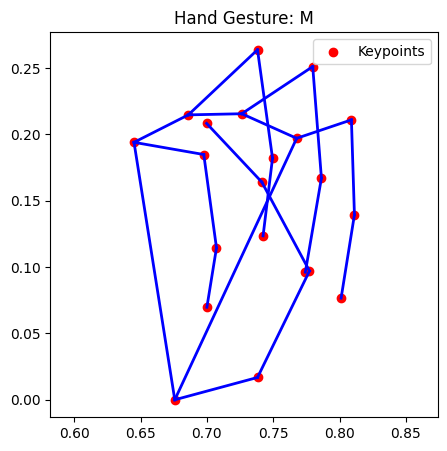

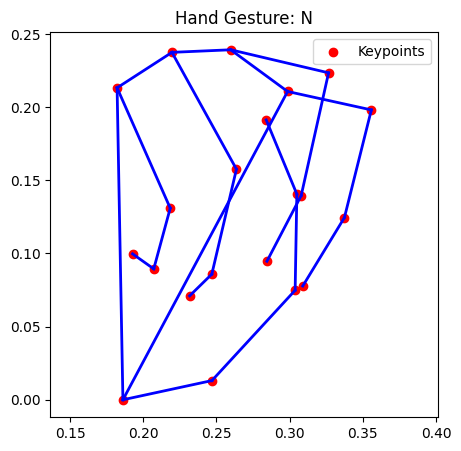

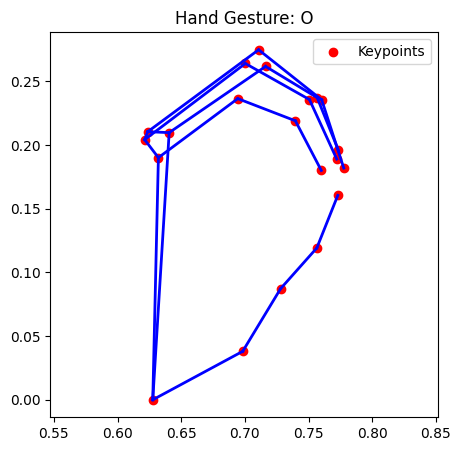

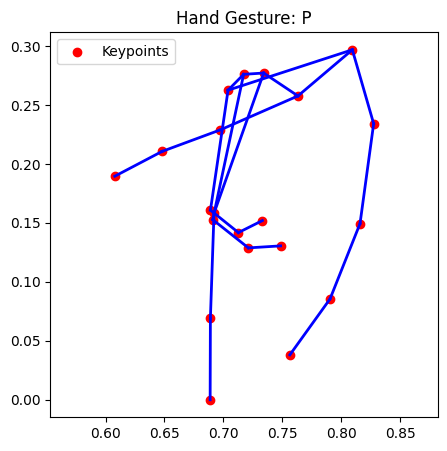

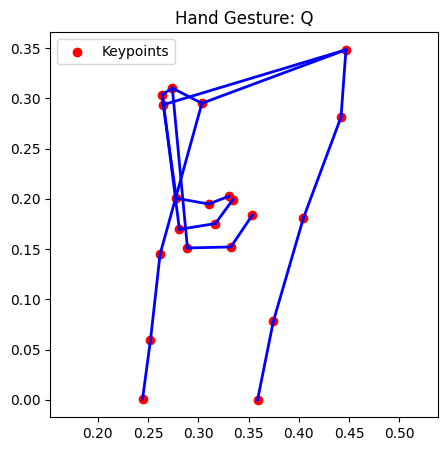

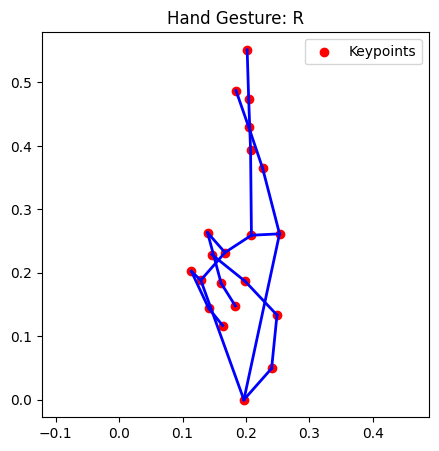

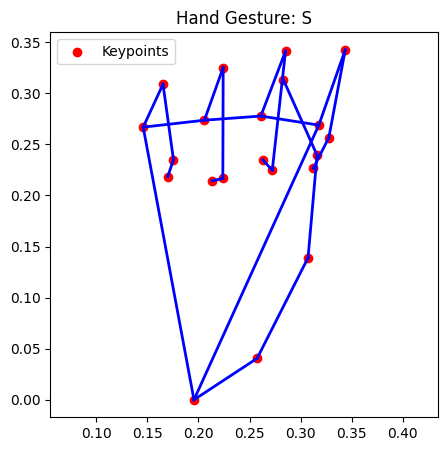

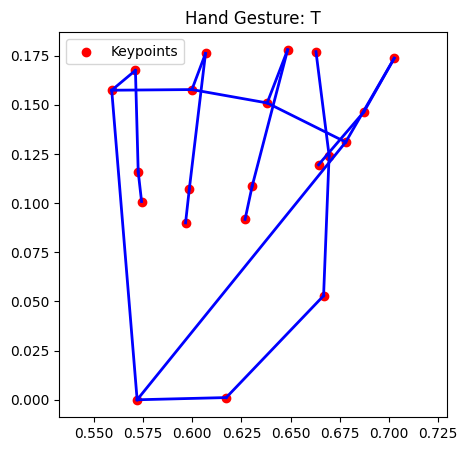

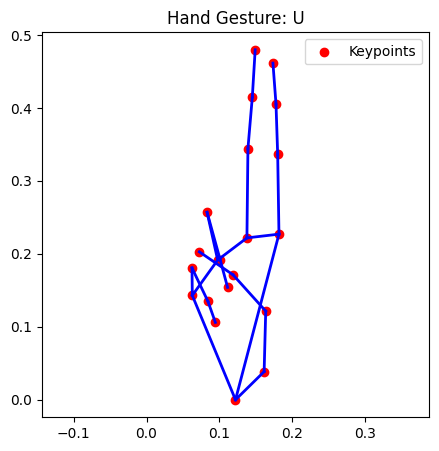

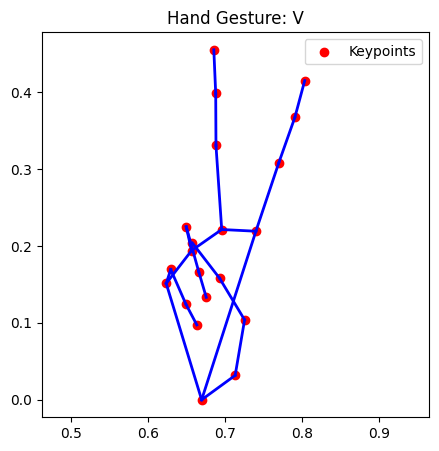

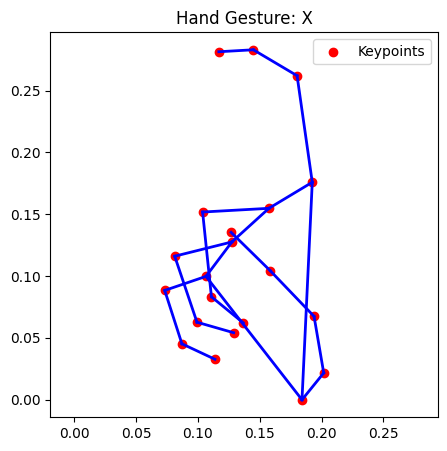

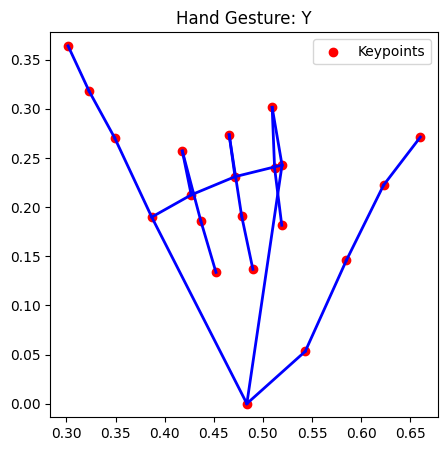

In [192]:
label_a_df = df[df['label'] == 'A']
plot_hand_gesture(label_a_df, 3)
label_b_df = df[df['label'] == 'B']
plot_hand_gesture(label_b_df, 9)
label_c_df = df[df['label'] == 'C']
plot_hand_gesture(label_c_df, 1)
label_d_df = df[df['label'] == 'D']
plot_hand_gesture(label_d_df, 3)
label_e_df = df[df['label'] == 'E']
plot_hand_gesture(label_e_df, 4)
label_f_df = df[df['label'] == 'F']
plot_hand_gesture(label_f_df, 5)
label_g_df = df[df['label'] == 'G']
plot_hand_gesture(label_g_df, 7)
label_h_df = df[df['label'] == 'H']
plot_hand_gesture(label_h_df, 8)
label_i_df = df[df['label'] == 'I']
plot_hand_gesture(label_i_df, 9)
label_k_df = df[df['label'] == 'K']
plot_hand_gesture(label_k_df, 0)
label_l_df = df[df['label'] == 'L']
plot_hand_gesture(label_l_df, 1)
label_m_df = df[df['label'] == 'M']
plot_hand_gesture(label_m_df, 2)
label_n_df = df[df['label'] == 'N']
plot_hand_gesture(label_n_df, 3)
label_o_df = df[df['label'] == 'O']
plot_hand_gesture(label_o_df, 5)
label_p_df = df[df['label'] == 'P']
plot_hand_gesture(label_p_df, 7)
label_q_df = df[df['label'] == 'Q']
plot_hand_gesture(label_q_df, 1)
label_r_df = df[df['label'] == 'R']
plot_hand_gesture(label_r_df, 9)
label_s_df = df[df['label'] == 'S']
plot_hand_gesture(label_s_df, 4)
label_t_df = df[df['label'] == 'T']
plot_hand_gesture(label_t_df, 5)
label_u_df = df[df['label'] == 'U']
plot_hand_gesture(label_u_df, 4)
label_v_df = df[df['label'] == 'V']
plot_hand_gesture(label_v_df, 6)
label_x_df = df[df['label'] == 'X']
plot_hand_gesture(label_x_df, 8)
label_y_df = df[df['label'] == 'Y']
plot_hand_gesture(label_y_df, 2)

In [193]:
# --- Check and Remove Duplicates --- # ADD THIS SECTION
num_duplicates = df.duplicated().sum()
print(f"Found {num_duplicates} duplicate rows.")
if num_duplicates > 0:
    print("Removing duplicate rows...")
    df.drop_duplicates(inplace=True) # inplace=True modifies the DataFrame directly
    print(f"Shape after removing duplicates: {df.shape}")
else:
    print("No duplicate rows to remove.")

Found 17 duplicate rows.
Removing duplicate rows...
Shape after removing duplicates: (4783, 43)


In [194]:
# --- Separate Features (X) and Labels (y) ---
X = df.drop('label', axis=1).values
y_str = df['label'].values

print(f"\nFeatures (X) shape (post-deduplication): {X.shape}")
print(f"Labels (y_str) shape (post-deduplication): {y_str.shape}")
# ... (rest of Step 2 remains the same: create mappings, convert labels, split data, one-hot encode) ...


Features (X) shape (post-deduplication): (4783, 42)
Labels (y_str) shape (post-deduplication): (4783,)


In [195]:
# --- Create Numerical Label Mapping ---
unique_labels = sorted(np.unique(y_str))
num_classes = len(unique_labels)
label_to_int = {label: i for i, label in enumerate(unique_labels)}
int_to_label = {i: label for i, label in enumerate(unique_labels)}
print(f"\nFound {num_classes} unique classes: {unique_labels}")
print(f"Label to Integer mapping: {label_to_int}")


Found 24 unique classes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']
Label to Integer mapping: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'M': 11, 'N': 12, 'O': 13, 'P': 14, 'Q': 15, 'R': 16, 'S': 17, 'T': 18, 'U': 19, 'V': 20, 'W': 21, 'X': 22, 'Y': 23}


In [196]:
# --- Save the Label Mapping ---
try:
    with open(LABEL_MAP_FILE, 'wb') as f:
        pickle.dump(int_to_label, f)
    print(f"Integer-to-Label mapping saved to {LABEL_MAP_FILE}")
except IOError as e:
    print(f"Warning: Could not save label map file: {e}")

Integer-to-Label mapping saved to label_map_new.pkl


In [197]:
# --- Convert String Labels to Numerical Labels ---
y = np.array([label_to_int[label] for label in y_str])
print(f"\nNumerical labels (y) shape: {y.shape}")



Numerical labels (y) shape: (4783,)


In [198]:
# --- Data Splitting ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
)
print(f"\nData split:")
print(f"  Training samples: {X_train.shape[0]}")
print(f"  Testing samples:  {X_test.shape[0]}")


Data split:
  Training samples: 3826
  Testing samples:  957


In [199]:
# --- One-Hot Encode Numerical Labels ---
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)
print(f"\nLabels after one-hot encoding:")
print(f"  y_train_cat shape: {y_train_cat.shape}")
print(f"  y_test_cat shape:  {y_test_cat.shape}")


Labels after one-hot encoding:
  y_train_cat shape: (3826, 24)
  y_test_cat shape:  (957, 24)


Building The model

In [200]:
# Import necessary libraries
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

In [201]:
# --- Model Configuration ---
INPUT_SHAPE = (42,)               # Example: 21 landmarks * 2 coordinates
NUM_CLASSES = num_classes        # Number of unique letters
MODEL_SAVE_PATH = 'sign_language_model_new.h5' # Use .keras format

In [202]:
# --- Build the Model ---
# A simple Multi-Layer Perceptron (MLP)
model = Sequential([
    Dense(128, activation='relu', input_shape=INPUT_SHAPE),
    Dropout(0.3), # Helps prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    # Output layer: NUM_CLASSES neurons, softmax for multi-class probability distribution
    Dense(NUM_CLASSES, activation='softmax')
])

In [203]:
# --- Compile the Model ---
model.compile(optimizer='adam',                       # Adam is a good general-purpose optimizer
              loss='categorical_crossentropy',      # Suitable for one-hot encoded labels
              metrics=['accuracy'])                 # Track accuracy during training

model.summary() # Print model architecture

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               5504      
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 24)                792       
                                                                 
Total params: 16632 (64.97 KB)
Trainable params: 16632

In [204]:
# --- Callbacks for Training ---
# EarlyStopping: Stop training if validation loss doesn't improve for 'patience' epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
# ReduceLROnPlateau: Reduce learning rate if validation loss plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

In [205]:
# --- Train the Model ---
EPOCHS = 100
BATCH_SIZE = 32

print("\nStarting model training...")
history = model.fit(
    X_train, y_train_cat,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2, # Use 20% of training data for validation during training
    callbacks=[early_stopping, reduce_lr],
    verbose=1 # Show progress bar
)

print("Model training finished.")


Starting model training...
Epoch 1/100
96/96 [==============================] - 1s 4ms/step - loss: 3.1727 - accuracy: 0.0608 - val_loss: 3.1295 - val_accuracy: 0.0927 - lr: 0.0010
Epoch 2/100
96/96 [==============================] - 0s 2ms/step - loss: 3.0512 - accuracy: 0.1124 - val_loss: 2.8326 - val_accuracy: 0.2115 - lr: 0.0010
Epoch 3/100
96/96 [==============================] - 0s 2ms/step - loss: 2.6290 - accuracy: 0.2000 - val_loss: 2.1936 - val_accuracy: 0.3107 - lr: 0.0010
Epoch 4/100
96/96 [==============================] - 0s 2ms/step - loss: 2.1055 - accuracy: 0.3010 - val_loss: 1.6672 - val_accuracy: 0.5653 - lr: 0.0010
Epoch 5/100
96/96 [==============================] - 0s 2ms/step - loss: 1.7009 - accuracy: 0.4007 - val_loss: 1.3277 - val_accuracy: 0.6397 - lr: 0.0010
Epoch 6/100
96/96 [==============================] - 0s 2ms/step - loss: 1.4693 - accuracy: 0.4771 - val_loss: 1.1652 - val_accuracy: 0.6410 - lr: 0.0010
Epoch 7/100
96/96 [=============================

In [206]:
# --- Save the Trained Model ---
print(f"Attempting to save model to: {MODEL_SAVE_PATH}")
try:
    model.save(MODEL_SAVE_PATH)
    print(f"Model successfully saved to {MODEL_SAVE_PATH}")
except Exception as e:
    print(f"ERROR SAVING MODEL: {e}")

Attempting to save model to: sign_language_model_new.h5
Model successfully saved to sign_language_model_new.h5


c:\Users\Reez\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


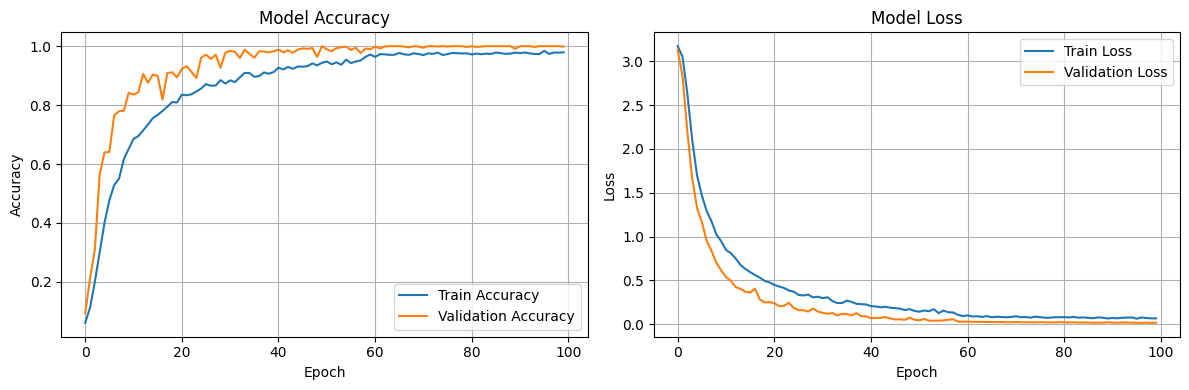

In [207]:
# --- Plot Training History ---
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_history(history)

Evaluate with pickle

In [208]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [209]:
print("--- Step 4: Evaluation ---")

# --- Configuration ---
# Define the file paths RIGHT HERE before they are used
MODEL_PATH = 'sign_language_model_new.h5'
LABEL_MAP_FILE = 'label_map_new.pkl'
print(f"Model path set to: {MODEL_PATH}")
print(f"Label map file path set to: {LABEL_MAP_FILE}")

--- Step 4: Evaluation ---
Model path set to: sign_language_model_new.h5
Label map file path set to: label_map_new.pkl


In [210]:
# --- Load Model ---
print("Loading model...")
try:
    model = tf.keras.models.load_model(MODEL_PATH)
    print(f"Model loaded successfully from {MODEL_PATH}")
except Exception as e:
    print(f"FATAL ERROR loading model: {e}")
    exit() # Stop if model can't be loaded

Loading model...
Model loaded successfully from sign_language_model_new.h5


In [211]:
# --- Load the INT -> LABEL mapping DIRECTLY ---
print(f"Loading label map from {LABEL_MAP_FILE}...")
try:
    # This line uses LABEL_MAP_FILE, which MUST be defined above
    with open(LABEL_MAP_FILE, 'rb') as f:
        int_to_label = pickle.load(f)
    # Get class names in the correct order
    class_names = [int_to_label[i] for i in range(len(int_to_label))]
    NUM_CLASSES = len(class_names)
    print(f"Label map loaded successfully. Classes ({NUM_CLASSES}): {class_names}")
except FileNotFoundError:
    # This line also uses LABEL_MAP_FILE
    print(f"FATAL ERROR: Label map file '{LABEL_MAP_FILE}' not found.")
    print("Please ensure 'label_map.pkl' exists in the same directory and Step 2 was run correctly.")
    exit() # Stop if the map file isn't found
except Exception as e:
     # This line also uses LABEL_MAP_FILE
     print(f"FATAL ERROR loading label map from {LABEL_MAP_FILE}: {e}")
     exit() # Stop on other loading errors

Loading label map from label_map_new.pkl...
Label map loaded successfully. Classes (24): ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']


In [212]:
# # --- Data Splitting ---
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y,
#     test_size=TEST_SIZE,
#     random_state=RANDOM_STATE,
#     stratify=y
# )
# print(f"\nData split:")
# print(f"  Training samples: {X_train.shape[0]}")
# print(f"  Testing samples:  {X_test.shape[0]}")

In [213]:
# --- Make Predictions on Test Data ---
predictions_proba = model.predict(X_test)

30/30 [==============================] - 0s 2ms/step


In [214]:
# Get the index of the highest probability class for each sample
predictions = np.argmax(predictions_proba, axis=1)

In [215]:
# y_test contains the original numerical labels (0, 1, 2...)
# We need these for comparison with predictions
y_test_indices = np.argmax(y_test_cat, axis=1) # Convert one-hot back to indices OR use y_test directly if available

In [216]:
# --- Calculate Accuracy ---
accuracy = accuracy_score(y_test_indices, predictions)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 99.90%


In [217]:
# --- Classification Report ---
# Shows precision, recall, f1-score for each class
print("\nClassification Report:")
report = classification_report(y_test_indices, predictions, target_names=class_names, zero_division=0)
print(report)


Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        40
           B       1.00      1.00      1.00        40
           C       1.00      1.00      1.00        39
           D       1.00      1.00      1.00        40
           E       1.00      1.00      1.00        40
           F       1.00      1.00      1.00        39
           G       1.00      1.00      1.00        39
           H       1.00      1.00      1.00        40
           I       1.00      1.00      1.00        40
           K       1.00      1.00      1.00        40
           L       1.00      1.00      1.00        40
           M       1.00      1.00      1.00        40
           N       1.00      1.00      1.00        40
           O       1.00      1.00      1.00        40
           P       1.00      1.00      1.00        40
           Q       1.00      1.00      1.00        40
           R       1.00      1.00      1.00        40
   

In [218]:
# --- Confusion Matrix ---
# Shows which classes are being confused with others
cm = confusion_matrix(y_test_indices, predictions)

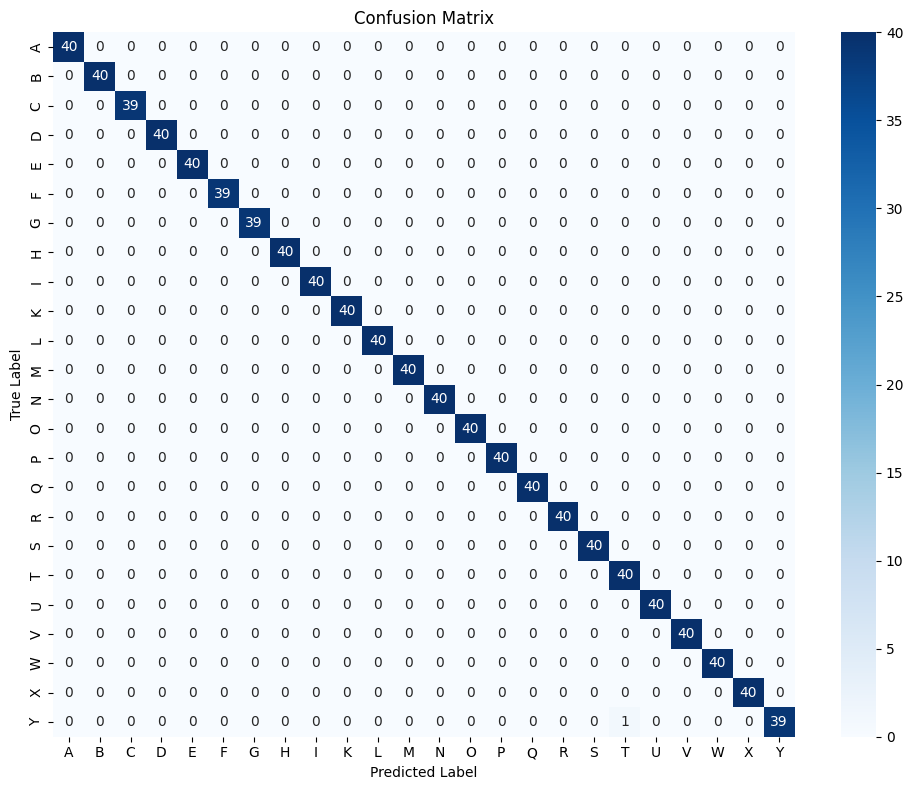

In [219]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()